# SESSION 3: AGENT WITH HEURISTIC PLANNING CAPABILITIES

In [73]:
import numpy as np
from random import choice,randint,shuffle,random

## A* 

In [74]:
class search_node:
  def __init__(self, state, parent, action, path_cost, gn):
    self.state  = state
    self.parent = parent
    self.action = action
    self.path_cost = path_cost
    self.gn = gn
    self.fn = path_cost + gn

  def is_equal_to(self, node):
    return np.array_equal(self.state, node.state)


def create_successor(env, parent, action, end_node):

      state = env.execute(parent, action, end_node.state)
      if type(state) == type(None): return None
      #We assume that all actions has cost 1
      new_node = search_node(state, parent, action,
                             parent.path_cost + 1/env.KB["cells"][state[0], 
                             state[1]],manhattan(state, end_node.state))

      return new_node



## ALGORITHM A* 

def check_frontier(child, frontier):
   # replace frontier nodes with same state
   # but greater cost
   for i in range(len(frontier)):
       n = frontier[i]
       if n.is_equal_to(child):
          if child.fn < n.fn:
             frontier[i] = child
             return True
   return False

def a_star(env, start_node, end_node):
  frontier = []
  visited = []
  frontier.append(start_node)
  while frontier:
    #sort the frontier nodes by f(n)
    frontier.sort(key=lambda n: n.fn)
    # get the next node from the frontier
    node = frontier.pop(0)
    # check if visited
    if str(node.state) in visited:
      continue
   # mark the node as visited
    visited.append(str(node.state))
    # check if the node is the goal
    if node.is_equal_to(end_node):
      return node    # SUCCESS
    # expand the frontier
    for action in env.actions:
      if not env.valid_action(node.state, action): continue
      child = create_successor(env, node, action, end_node)
      if type(child) == type(None): continue
      if not check_frontier(child, frontier):
        frontier.append(child)
  #FAILURE
  return None



def search_path(env, Ini, End):

  start_node = search_node(Ini, None, None, 0, 0)
  end_node   = search_node(End, None, None, 0, 0)

  solution = a_star(env, start_node, end_node)


  if solution:
    path = []
    while solution.parent:
      path = [solution.action] + path
      solution = solution.parent

    return path
  else:
    return None

## AGENT IMPLEMENTATION

In [75]:
def manhattan(pos1, pos2):
  return sum(abs(a - b) for a, b in zip(pos1, pos2))

In [76]:
def set_zone(M, pos, width, length, dir, value): # M es la cuadricula
  # pos tupla (i, j) de la esquina superior izq de la zona
  i = pos[0]    # width y length de la zona
  j = pos[1]
  if dir == "v": # dir es la orientacion
    aux = width
    width = length
    length = aux
  # Comprovar si la zona es valida
  valid = (0  <= i + width <= len(M))
  valid = valid and  (0  <= j + length <= len(M))
  if valid:
    O = np.full((width, length), value)
    M[i: i + width, j: j + length] = O

# cost = 1 / valor, valor en [0, 1]

In [77]:
class Agent:

   def __init__(self, N: int, type):

      matrix =  np.ones((N,N))
      
      set_zone(matrix, (50, 15), 8, 13, "h", 0.5)
      set_zone(matrix, (15, 43), 10, 16, "h", 0.5)
      set_zone(matrix, (0, 19), 47, 1, "h", 0)
      set_zone(matrix, (23, 55), 47, 1, "h", 0)
      if type == "t0":
        set_zone(matrix, (15, 43), 10, 16, "h", 0.3)
        set_zone(matrix, (23, 55), 47, 1, "h", 0)
      elif type == "t1":
        set_zone(matrix, (15, 43), 17, 16, "h", 0.5)
        set_zone(matrix, (23, 55), 47, 1, "h", 0)
      elif type == "t2":
        set_zone(matrix, (15, 43), 21, 16, "h", 0.5)
        set_zone(matrix, (23, 55), 47, 1, "h", 0)
      elif type == "t3":
        set_zone(matrix, (30, 57), 8, 13, "h", 0.7)
        set_zone(matrix, (40, 56), 8, 13, "h", 0.8)
        set_zone(matrix, (50, 57), 8, 13, "h", 0.7)
        set_zone(matrix, (23, 55), 47, 1, "h", 0)
      elif type == "t4":
        set_zone(matrix, (0, 3), 19, 1, "h", 0.5)
        set_zone(matrix, (1, 1), 19, 1, "h", 0.5)
      elif type == "t5":
        for i in range(0, 20, 4):
          set_zone(matrix, (0, 3 +i), 18, 1, "h", 0.5)
          set_zone(matrix, (2, 1 +i), 18, 1, "h", 0.5)
      elif type == "t6":
        for i in range(0, 20, 4):
          set_zone(matrix, (0, 3 +i), 18, 1, "h", 0.1)
          set_zone(matrix, (2, 1 +i), 18, 1, "h", 0.1)
      elif type == "t7":
        for i in range(0, 20, 4):
          set_zone(matrix, (0, 3 +i), 18, 1, "h", 0)
          set_zone(matrix, (2, 1 +i), 18, 1, "h", 0)
      elif type == "t8":
        for i in range(0, 20, 4):
          set_zone(matrix, (3 +i, 0), 18, 1, "v", 0)
          set_zone(matrix, (1 +i, 2), 18, 1, "v", 0)
      elif type == "t9":
        for i in range(0, 20, 4):
          set_zone(matrix, (3 +i, 0), 19, 1, "v", 0)
          set_zone(matrix, (1 +i, 1), 19, 1, "v", 0)

      self.KB = { "size": N,
                  "cells": matrix,
                  "pos": np.array([35,35])
              }

      self.actions = {"up":    [-1, 0],
                      "left":  [0, -1],
                      "right": [0,  1],
                      "down":  [1,  0] 
                    }
   
   def updateKB(self, percepts, action):
           
      self.KB["pos"] = self.KB["pos"] + action

   def valid(self, k, percept): #excution time
       a = np.array(self.actions[k])
       s = np.array([1,1]) + a
       return percept[s[0],s[1]] != 0

   def valid_action(self, state, k): #planning time / To be used within bfs function
       #state debe ser un array 2D
       if type(state) != type(None):
        new_pos = state + self.actions[k]
        valid = (0  <= new_pos[0] < self.KB["size"])
        valid = valid and  (0  <= new_pos[1] < self.KB["size"])
        return valid
          
   def action(self, percept, default=None):

      if default!=None and default in self.actions:
        k = default
      else:
        valid_actions = [k for k in self.actions if self.valid(k, percept)]
        k = np.random.choice(valid_actions)
       
      if default!=None and not self.valid(k, percept):
        ##What to return if it is not possible to execute the action (obstacle)?
        return [None, None]
      
      a = np.array(self.actions[k])

      return [k, a]
        
   def getPercept(self):
      matrix = self.KB["cells"]
      # we surround the matrix with a border of blocked cells (0)
      matrix = np.pad(matrix, pad_width=1, mode='constant', constant_values=0)
      # positions in the new extended matrix
      i, j = self.KB["pos"][0] + 1, self.KB["pos"][1] + 1
      # 3x3 matrix 
      return matrix[i-1 : i+2, j-1 : j+2]

   def random_loop(self, iters):

      path = []
      for i in range(iters):
         X = self.getPercept()
         [k, a] = self.action(X, default=None)
         path.append(self.KB["pos"])
         self.updateKB(X, a)

      return path

   def execute(self, parent, action, end):
    # get the new position of the agent  state, parent, action, path_cost, gn, fn
      #node = search_node(None, parent, self.actions[action], 0, manhattan(self.KB["pos"], end), 0) 
    # by applying the action to the parent’s state                                                       
      new_position = parent.state + self.actions[action]        

      # get the value of the KB matrix if so, return the new position
      matrix = self.KB["cells"]                                    
      valor = matrix[new_position[0], new_position[1]]    

      # Check if the value is a free cell if so, return the new position
      if valor != 0:
        return new_position
      else: return None    # else return None


   def loop_with_plan(self, Ini, plan):
       
      self.KB["pos"] = Ini
      path = []
      
      for action in plan:
         X = self.getPercept()
         [k, a] = self.action(X, default=action)
         ##CHECK if the plan is interrupted by an obstacle
         if k==None:
           return None
         path.append(self.KB["pos"])
         self.updateKB(X, a)

      return path
   
   def get_a_plan(self, Ini, End):
      
      plan = search_path(self, Ini, End)
      return plan

   def goal_oriented_loop(self, Ini, End):
      plan = self.get_a_plan(Ini, End)
      result = self.loop_with_plan(Ini, plan)
  

      return result
      

In [78]:
agent = Agent(70, "t")

### TEST WITH VISUALIZATION

In [79]:
# Matrix with obstacles

### Agent with goals

In [80]:
path = agent.goal_oriented_loop(np.array([69,69]), np.array([0,0]))

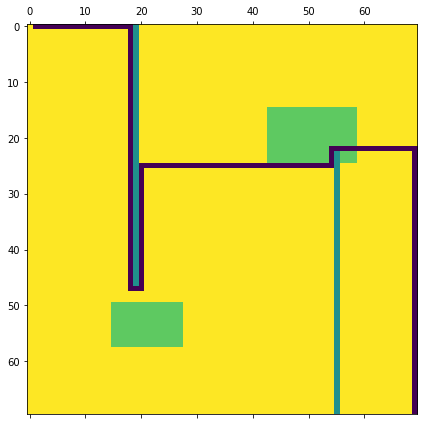

In [81]:
# static display of full path
import matplotlib.pyplot as plt
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')

In [82]:
agent = Agent(70, "t0")  # subimos coste

In [83]:
path = agent.goal_oriented_loop(np.array([69,69]), np.array([0,0]))

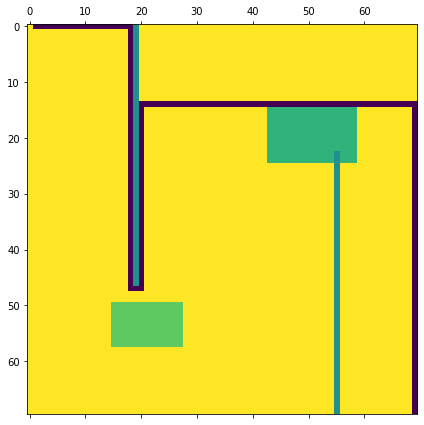

In [84]:
# static display of full path

matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')

In [85]:
agent = Agent(70, "t1")  # subimos altura obstaculo

In [86]:
path = agent.goal_oriented_loop(np.array([69,69]), np.array([0,0]))

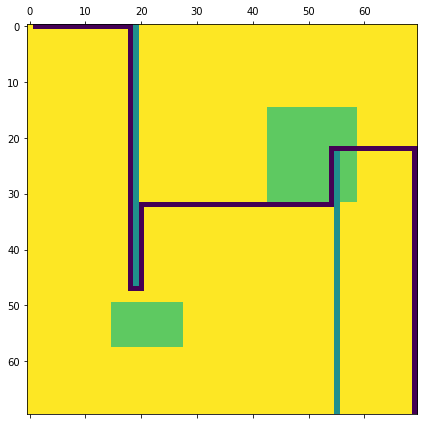

In [87]:
# static display of full path

matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')

In [88]:
agent = Agent(70, "t2")  # subimos altura obstaculo mas

In [89]:
path = agent.goal_oriented_loop(np.array([69,69]), np.array([0,0]))

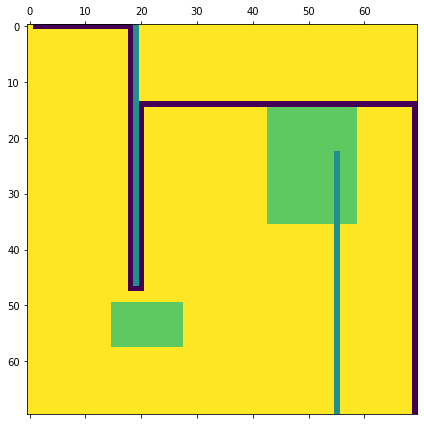

In [90]:
# static display of full path

matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')

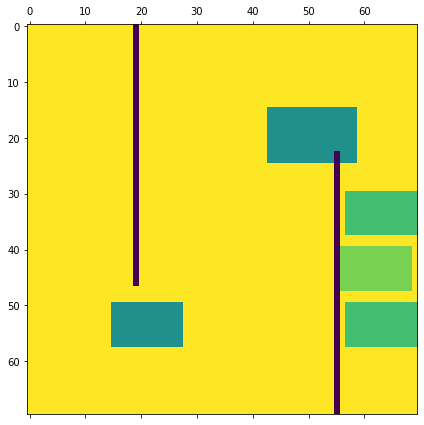

In [103]:
agent = Agent(70, "t3")
matrix = agent.KB["cells"].copy()
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')

In [92]:
path = agent.goal_oriented_loop(np.array([69,69]), np.array([0,0]))

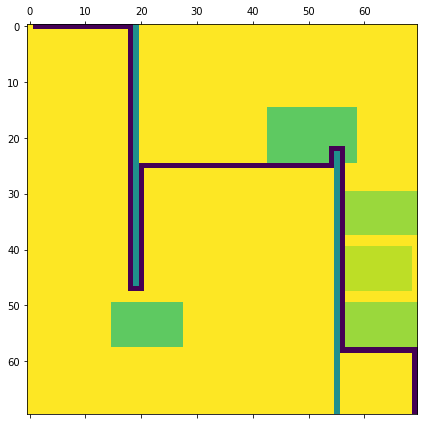

In [93]:
# static display of full path

matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')

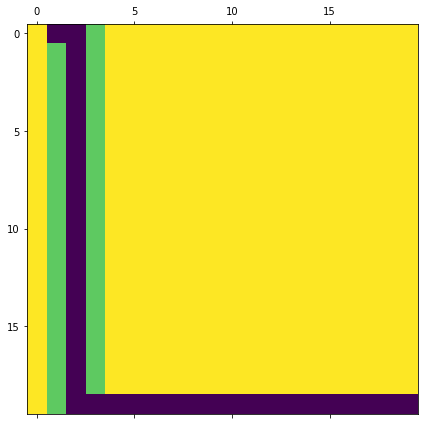

In [94]:
agent = Agent(20, "t4")
path = agent.goal_oriented_loop(np.array([19,19]), np.array([0,0]))
# static display of full path

matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')

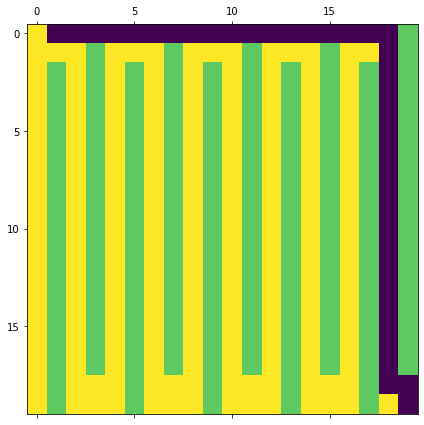

In [106]:
agent = Agent(20, "t5") # coste 1/0.5
path = agent.goal_oriented_loop(np.array([19,19]), np.array([0,0]))
# static display of full path

matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')

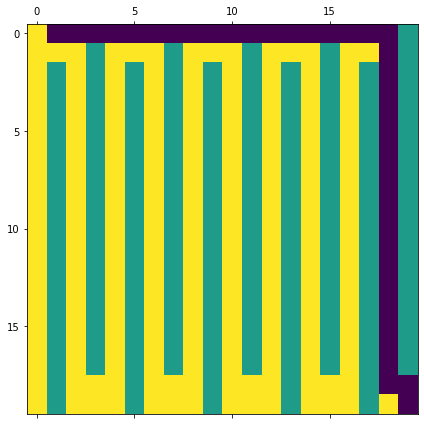

In [105]:
agent = Agent(20, "t6") # subimos coste, coste 1/0.1
path = agent.goal_oriented_loop(np.array([19,19]), np.array([0,0]))
# static display of full path

matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')

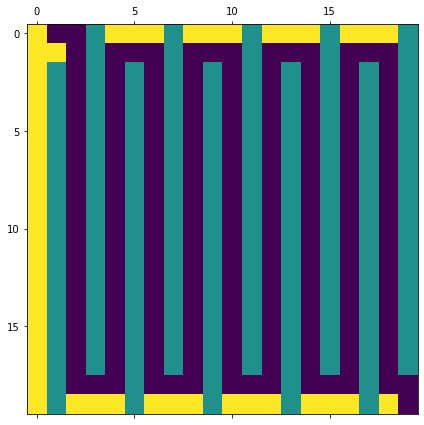

In [104]:
agent = Agent(20, "t7") # coste infinito 1/0
path = agent.goal_oriented_loop(np.array([19,19]), np.array([0,0]))
# static display of full path

matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')

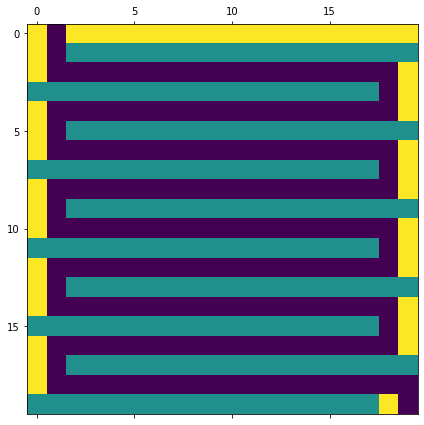

In [98]:
agent = Agent(20, "t8") # horizontal
path = agent.goal_oriented_loop(np.array([19,19]), np.array([0,0]))
# static display of full path

matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')

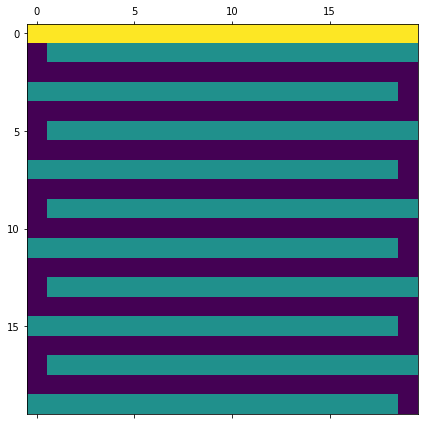

In [99]:
agent = Agent(20, "t9") # horizontal
path = agent.goal_oriented_loop(np.array([19,19]), np.array([0,0]))
# static display of full path

matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')